In [7]:
# Importing Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from PIL import Image  # To handle image conversions

In [26]:
# Function to check and convert image formats
def validate_and_convert_images(base_dir):
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    if img.format not in ["JPEG", "PNG", "GIF", "BMP"]:
                        # Convert to a supported format (e.g., PNG)
                        new_file_path = file_path.rsplit('.', 1)[0] + '.png'
                        img.convert('RGB').save(new_file_path)
                        os.remove(file_path)
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

In [27]:
# Validate and convert images in the dataset
base_dir = 'Images/'
validate_and_convert_images(base_dir)

Error processing file Images/singkong.rar: cannot identify image file 'C:\\Users\\Wahyu\\Image Classification Carbohydrate Food - Copy 2\\Images\\singkong.rar'
Error processing file Images/Ubi dan singkong.zip: cannot identify image file 'C:\\Users\\Wahyu\\Image Classification Carbohydrate Food - Copy 2\\Images\\Ubi dan singkong.zip'


In [28]:
# Load datasets
img_size = 180
batch_size = 32

In [29]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.2,
    subset='training',
    batch_size=batch_size,
    image_size=(img_size, img_size)
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.2,
    subset='validation',
    batch_size=batch_size,
    image_size=(img_size, img_size)
)

Found 478 files belonging to 5 classes.
Using 383 files for training.
Found 478 files belonging to 5 classes.
Using 95 files for validation.


In [30]:
food_names = train_ds.class_names
print(food_names)

['banana', 'cassava', 'corn', 'potatoes', 'ubi']


In [31]:
# Display images
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

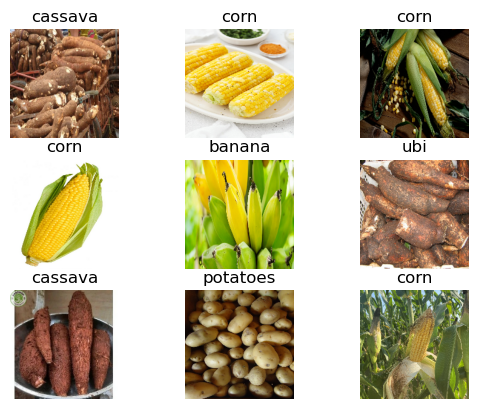

In [32]:
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(food_names[labels[i]])
        plt.axis('off')
plt.show()

In [33]:
import matplotlib.pyplot as plt

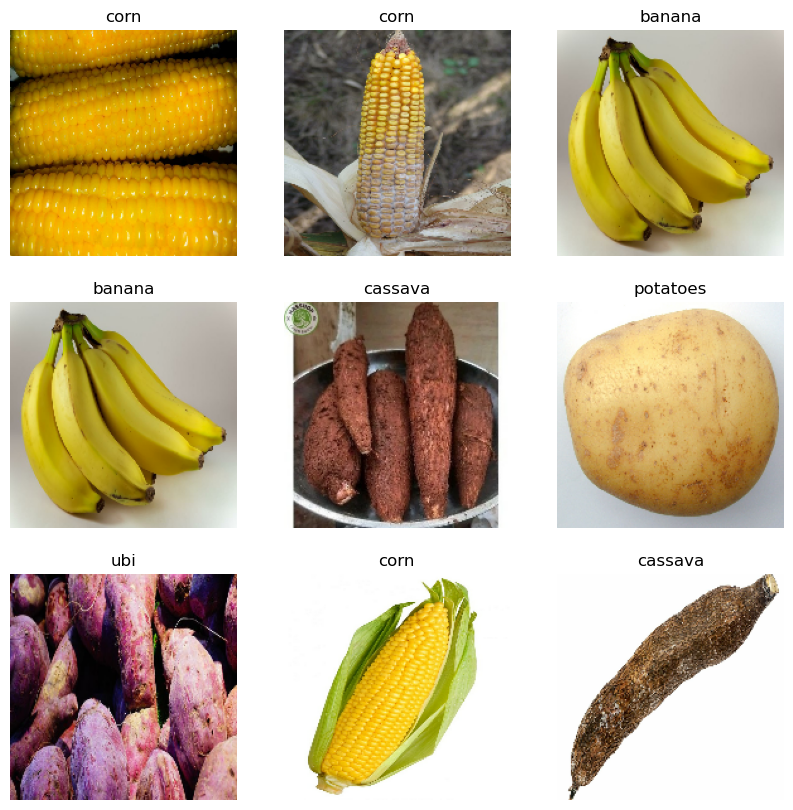

In [34]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(food_names[labels[i]])
        plt.axis('off')

In [35]:
AUTOTUNE = tf.data.AUTOTUNE

In [36]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [37]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

**Data Augmentation**

In [38]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

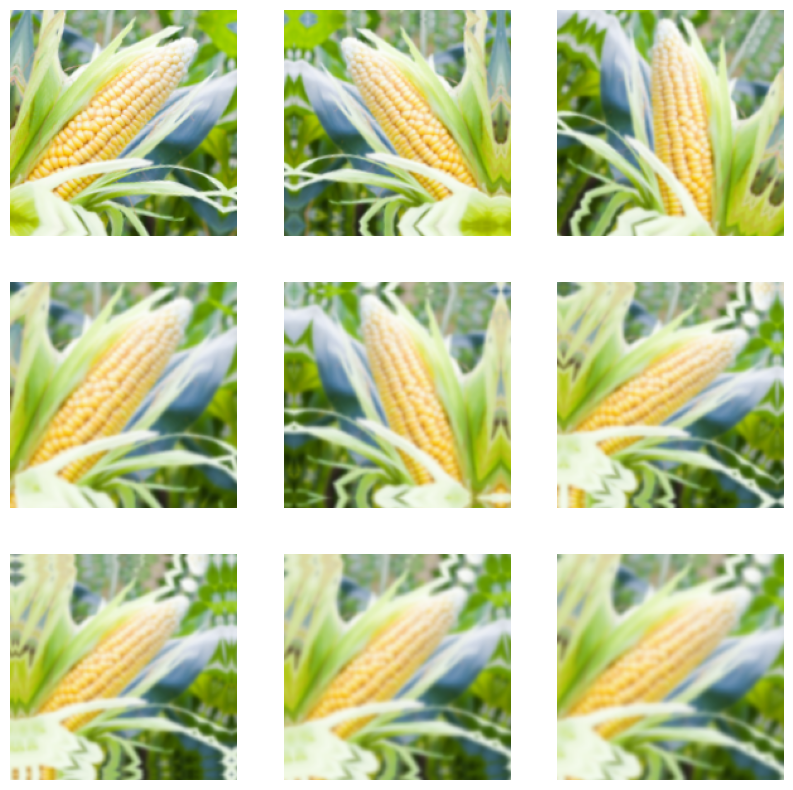

In [39]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

**Model Creation**

In [40]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,967,857 (45.65 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,572 (30.44 MB)

In [43]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 512ms/step - accuracy: 0.1628 - loss: 1.9873 - val_accuracy: 0.2316 - val_loss: 1.5682
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 363ms/step - accuracy: 0.2272 - loss: 1.5314 - val_accuracy: 0.3474 - val_loss: 1.4047
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 369ms/step - accuracy: 0.4391 - loss: 1.2796 - val_accuracy: 0.4947 - val_loss: 1.1596
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.4436 - loss: 1.1648 - val_accuracy: 0.6211 - val_loss: 1.0790
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 368ms/step - accuracy: 0.5724 - loss: 1.0204 - val_accuracy: 0.6211 - val_loss: 0.9553
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 364ms/step - accuracy: 0.5870 - loss: 0.9201 - val_accuracy: 0.6000 - val_loss: 0.9608
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.6514 - loss: 0.8485 - val_accuracy: 0.6421 - val_loss: 0.9533
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.6016 - loss: 0.8805 - val_accuracy: 0

In [44]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + food_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [45]:
classify_images('Sample/Potato.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


'The Image belongs to potatoes with a score of 76.73227787017822'

In [46]:
model.save('Carbohydrate_Food_Recog_Model.keras')